## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

warnings.filterwarnings('ignore')

%matplotlib inline

# wine(分類)

In [2]:
wine = datasets.load_wine()
w_x_train, w_x_test, w_y_train, w_y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=32)
# print(wine.target) 0, 1, 2 多元分類

In [3]:
wReg = LogisticRegression(solver='lbfgs', multi_class='multinomial').fit(w_x_train, w_y_train)
w_y_pred = wReg.predict(w_x_test)

In [4]:
w_acc = accuracy_score(w_y_test, w_y_pred)
print("Accuracy: ", w_acc)

Accuracy:  0.9166666666666666


# boston(回歸)

In [5]:
boston = datasets.load_boston()

# 為方便視覺化，我們只使用資料集中的 1 個 feature (column)
X = boston.data[:, np.newaxis, 2]
b_x_train, b_x_test, b_y_train, b_y_test = train_test_split(X, boston.target, test_size=0.1, random_state=32)
# print(boston.target) 回歸

In [6]:
bReg = LinearRegression().fit(b_x_train, b_y_train)
b_y_pred = bReg.predict(b_x_test)

In [7]:
# 可以看回歸模型的參數值
print('Coefficients: ', bReg.coef_)

# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f" % mean_squared_error(b_y_test, b_y_pred))

Coefficients:  [-0.6728213]
Mean squared error: 72.17


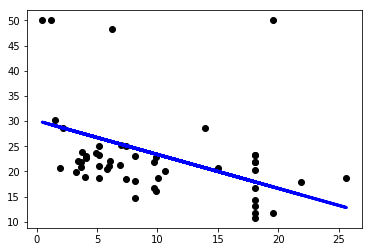

In [8]:
# 畫出回歸模型與實際資料的分佈
plt.scatter(b_x_test, b_y_test, color='black')
plt.plot(b_x_test, b_y_pred, color='blue', linewidth=3)
plt.show()

# breast_cancer(分類)

In [9]:
breast_cancer = datasets.load_breast_cancer()
c_x_train, c_x_test, c_y_train, c_y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.2, random_state=32)
# print(breast_cancer.target) 0, 1二元分類

In [10]:
cReg = LogisticRegression(solver='liblinear').fit(c_x_train, c_y_train)
c_y_pred = cReg.predict(c_x_test)

In [11]:
c_acc = accuracy_score(c_y_test, c_y_pred)
print("Accuracy: ", c_acc)

Accuracy:  0.9122807017543859
